# Question/Answer

- All are Numerical Columns
- No NULL values

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('santender.csv')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,SelectKBest,SelectPercentile
from sklearn.metrics import accuracy_score

In [8]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [9]:
df.shape

(76020, 371)

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

## variance threshold

In [12]:
v = VarianceThreshold(threshold=0.001)
v.fit(X_train)
v.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [13]:
X_train_v = v.transform(X_train)
X_test_v = v.transform(X_test)

In [14]:
X_train_v.shape,X_test_v.shape

((53214, 299), (22806, 299))

## Duplicate Columns

In [15]:
X_train_T = X_train_v.T
X_test_T = X_test_v.T

In [16]:
X_train_T.shape

(299, 53214)

In [19]:
type(X_train_T)  ### convert into dataframes

numpy.ndarray

In [20]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [23]:
dup = X_train_T.duplicated()

In [22]:
dup

21

In [24]:
keep = [not col for col in dup]

In [26]:
X_train_unique = X_train_T[keep].T
X_test_unique = X_test_T[keep].T

In [27]:
X_train_unique.shape,X_test_unique.shape

((53214, 278), (22806, 278))

## Mutual Information Classification

In [28]:
mi = mutual_info_classif(X_train_unique,y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

<AxesSubplot:>

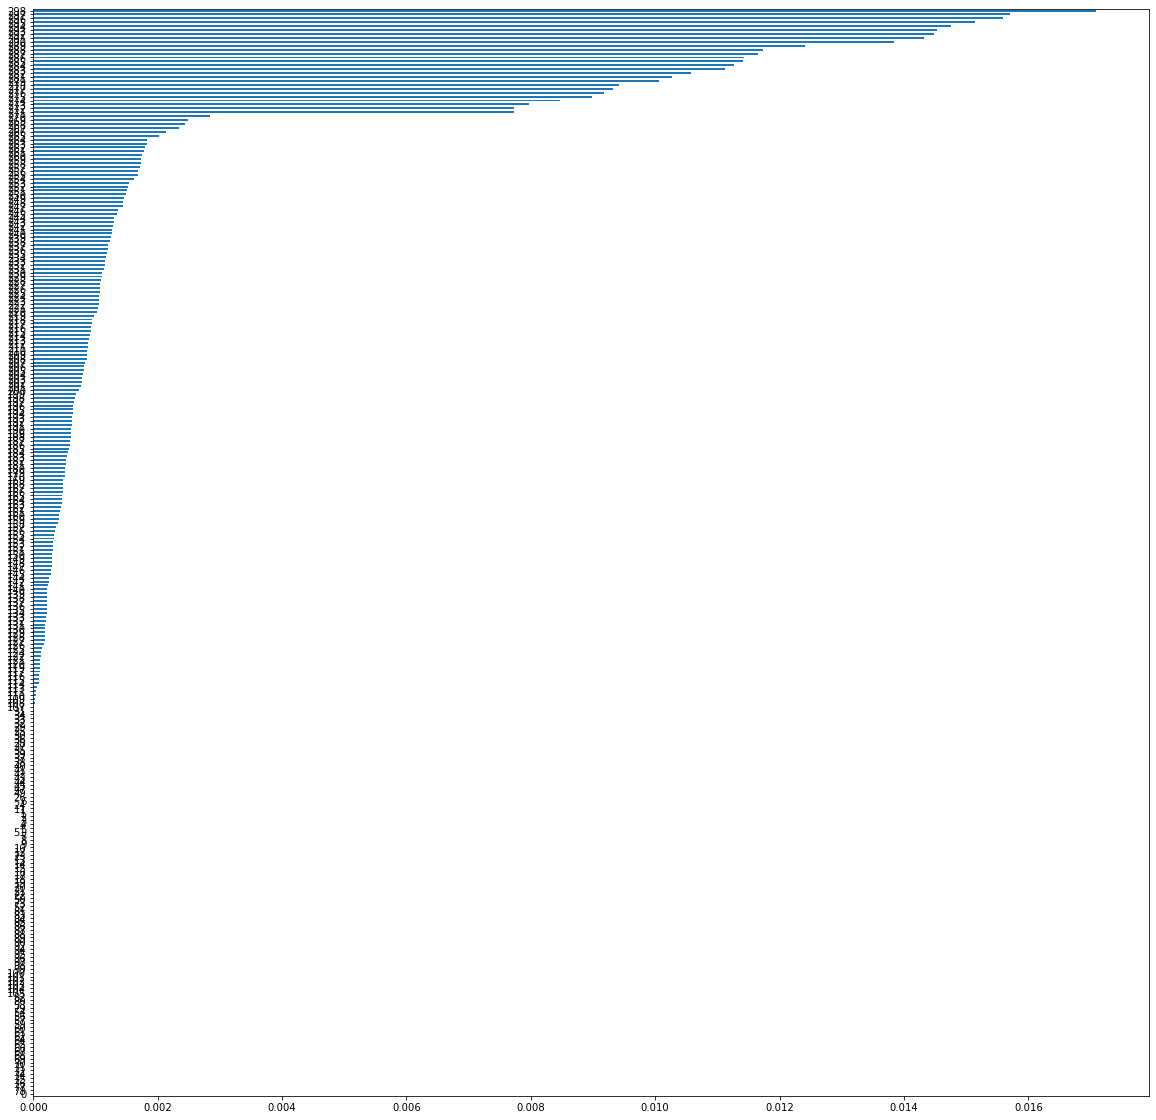

In [36]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns
mi.sort_values(ascending=True).plot.barh(figsize=(20,20))

In [38]:
sel = SelectPercentile(mutual_info_classif,percentile=20).fit(X_train_unique,y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  2,   9,  13,  22,  23,  33,  49,  50,  59,  62,  68,  69,  70,
             72,  75,  76,  78,  88,  96, 107, 108, 110, 115, 116, 119, 122,
            124, 125, 126, 127, 129, 133, 141, 144, 151, 153, 193, 224, 226,
            229, 230, 233, 249, 255, 258, 259, 260, 261, 262, 264, 266, 267,
            272, 273, 289, 298],
           dtype='int64')

In [40]:
len(X_train_unique.columns[sel.get_support()])

56

In [41]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [43]:
X_train_mi.shape

(53214, 56)

## Model Comparison

In [44]:
def random(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier(random_state=123)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    print('Accuracy Score:', accuracy_score(y_pred,y_test))

In [45]:
%%time
random(X_train_mi,X_test_mi,y_train,y_test)

Accuracy Score: 0.9538279400157853
Wall time: 7.88 s


In [46]:
%%time
random(X_train,X_test,y_train,y_test)

Accuracy Score: 0.9589581689029203
Wall time: 16.3 s
